In [2]:
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import itertools
import os.path
from os import path
import math
import xarray as xr
import glob

5micron
gravity
no_solute
5micron_seed
double_seeding
GCCN


NameError: name 'ax' is not defined

<Figure size 432x288 with 0 Axes>

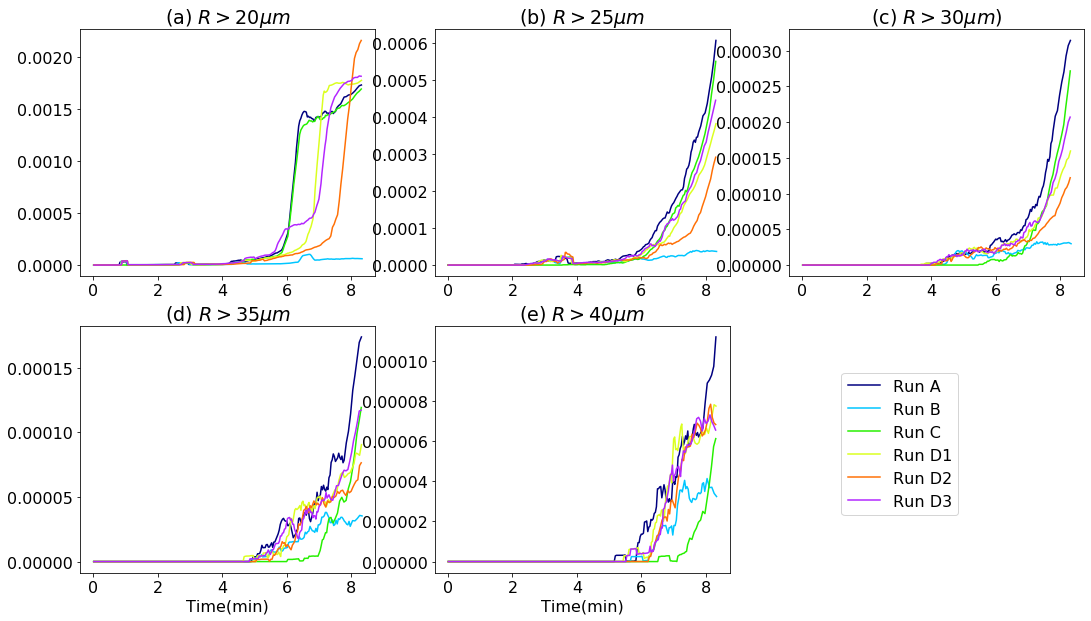

In [9]:
#plot auto-conversion rate for different thresholds
#setup plot layout
plt.clf()
plt.rc('font', size=16)
fig1,ax1=plt.subplots(2,3,figsize=(18, 10))
ncolor=7#len(N_seed)*len(r_seed)
#color_new = mpl.cm.get_cmap('jet', ncolor)
color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))#gist_rainbow#brg
n=0
#import droplet data
seedcase=['5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN']#,'gravity_seed','no_solute_seed']
figtag=['Run A','Run B','Run C','Run D1','Run D2','Run D3','Seed-NoTurb','Seed-NoSolu']

time_limit=500
selectcase=seedcase[0:6]
ncolor=7#
#color_new = mpl.cm.get_cmap('jet', ncolor)
color_new=plt.cm.gist_ncar(np.linspace(0,1,ncolor))#gist_rainbow#brg
#color_new=plt.cm.jet(np.linspace(0,1,ncolor))#nipy_spectral

dir='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/'
#dir='/glade/u/home/sisichen/seeding_cases_link/condensation_only/'

rhow=1000.0
vol=16.5e-2**3
rhoa=1.112683792645852
air_mass=rhoa*vol
plt.rc('font', size=16)
#for (iseedcase,indrop) in zip(selectcase,selectndrop):
for (iseedcase,itag) in zip(selectcase,figtag):
    ncdir=dir+str(iseedcase)+'/'
    print(iseedcase)
    ncfilelist=glob.glob(ncdir+'drop*')
    figlabel=str(itag)
    Timeseries=np.empty(shape=0)
    mass20_series=np.empty(shape=0)
    mass25_series=np.empty(shape=0)
    mass30_series=np.empty(shape=0)
    mass35_series=np.empty(shape=0)
    mass40_series=np.empty(shape=0)
    icase=0
    for ncfile in ncfilelist:
        fh = Dataset(ncfile,mode='r')
        #time
        times=fh.variables['TIMES'][:].data
        times=times[0]
        if times<=time_limit:
            #radius
            radius=fh.variables['R'][:].data
            radius=radius[0,:]
            idp=fh.variables['IDP'][:].data
            idp=idp[0,:]
            if icase==0:
                indrop=int(idp.shape[0]/(64*3))
            #number of maximum allowable droplets in each processor
            ndropmaxindex=np.linspace(0,indrop*64*3,65, dtype = int)
            ndropmaxindex=ndropmaxindex[1:]-1
            #real number of droplets in each processor
            ndropreal=np.array(idp[ndropmaxindex],dtype=int)
            #index of droplets
            idp_index=np.linspace(0,ndropreal[0]-1,ndropreal[0],dtype=int)
            for i in range(63): #i=1,63
                j=i+1
                idp_index=np.append(idp_index,ndropmaxindex[i]+1+np.linspace(0,ndropreal[j]-1,ndropreal[j],dtype=int))
            idp_index=np.ndarray.tolist(idp_index)
            r_dropreal=radius[idp_index]
            #r_dropreal[r_dropreal>50.e-6]=0;
            idp_dropreal=idp[idp_index]
            Timeseries=np.append(Timeseries,times)
            #statistics
            icase=icase+1
            r20=r_dropreal[r_dropreal>20e-6];
            r25=r_dropreal[r_dropreal>25e-6];
            r30=r_dropreal[r_dropreal>30e-6];
            r35=r_dropreal[r_dropreal>35e-6];
            r40=r_dropreal[r_dropreal>40e-6];
            mass20=sum(r20**3)*4/3*math.pi*rhow/air_mass
            mass20_series=np.append(mass20_series,mass20)
            mass25=sum(r25**3)*4/3*math.pi*rhow/air_mass
            mass25_series=np.append(mass25_series,mass25)
            mass30=sum(r30**3)*4/3*math.pi*rhow/air_mass
            mass30_series=np.append(mass30_series,mass30)
            mass35=sum(r35**3)*4/3*math.pi*rhow/air_mass
            mass35_series=np.append(mass35_series,mass35)
            mass40=sum(r40**3)*4/3*math.pi*rhow/air_mass
            mass40_series=np.append(mass40_series,mass40)
    time_ascen_index=sorted(range(len(Timeseries)), key=lambda k: Timeseries[k]) #sort out the timeseries in ascending order
    mass20_ascen=mass20_series[time_ascen_index]
    mass25_ascen=mass25_series[time_ascen_index]
    mass30_ascen=mass30_series[time_ascen_index]
    mass35_ascen=mass35_series[time_ascen_index]
    mass40_ascen=mass40_series[time_ascen_index]
    times_ascen=Timeseries[time_ascen_index]
    total_ntime=times_ascen.shape[0]
    auto_conversion20=np.zeros(total_ntime)
    auto_conversion25=np.zeros(total_ntime)
    auto_conversion30=np.zeros(total_ntime)
    auto_conversion35=np.zeros(total_ntime)
    auto_conversion40=np.zeros(total_ntime)
    
    for i in range(total_ntime-10):
        j=i+10
        auto_conversion20[j]=(mass20_ascen[j]-mass20_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion25[j]=(mass25_ascen[j]-mass25_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion30[j]=(mass30_ascen[j]-mass30_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion35[j]=(mass35_ascen[j]-mass35_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion40[j]=(mass40_ascen[j]-mass40_ascen[i])/(times_ascen[j]-times_ascen[i])
    ax1[0,0].plot(times_ascen/60, auto_conversion20*1e3,label=figlabel,color=color_new[n])
    ax1[0,1].plot(times_ascen/60, auto_conversion25*1e3, color=color_new[n])
    ax1[0,2].plot(times_ascen/60, auto_conversion30*1e3, color=color_new[n])
    ax1[1,0].plot(times_ascen/60, auto_conversion35*1e3, color=color_new[n])
    ax1[1,1].plot(times_ascen/60, auto_conversion40*1e3,color=color_new[n])
    n=n+1
ax1[0,0].legend(loc='lower right',bbox_to_anchor=(3, -1))
ax1[0,0].set_title('(a) $R>20 \mu m$')
ax1[0,1].set_title('(b) $R>25 \mu m$')
ax1[0,2].set_title('(c) $R>30 \mu m$)')
ax1[1,0].set_title('(d) $R>35 \mu m$')
ax1[1,1].set_title('(e) $R>40 \mu m$')
ax1[1,2].set_visible(False)
for i in range(3):
    ax1[1,i].set_xlabel('Time(min)')
for i,j in itertools.product(range(2),range(3)):
    ax[i,j].ticklabel_format(useMathText=True,useOffset=False,axis='y', style='sci', scilimits=(-5,-3))
    ax[i,j].set_xlim(0,time_limit/60)
    
ax1[0,0].set_ylabel('Autoconversion rate '+r'$(gkg^{-1}s^{-1})$')
ax1[0,0].yaxis.set_label_coords(-0.2,-0.1)
ax1[0,2].set_xlabel('Time(min)')
plt.rc('font', size=16)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=0.3)

0
5micron
1
gravity
2
no_solute
3
5micron_seed
4
double_seeding
5
GCCN


<Figure size 432x288 with 0 Axes>

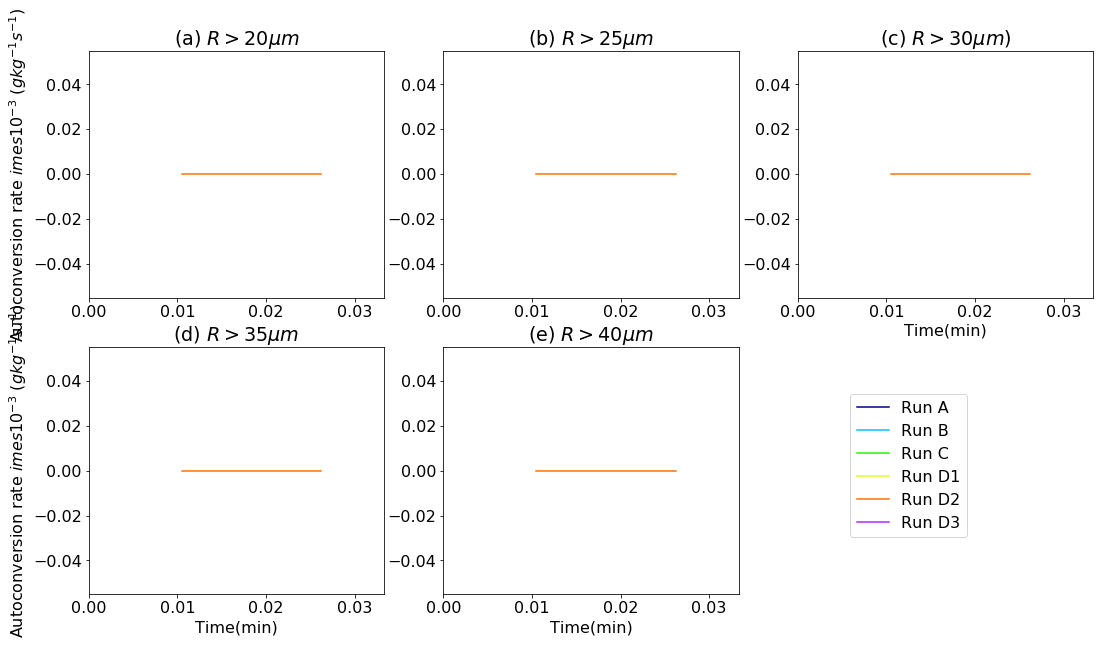

In [5]:
#plot auto-conversion rate for different thresholds in condensation_only case
#setup plot layout
plt.clf()
fig1,ax1=plt.subplots(2,3,figsize=(18, 10))
ncolor=7#len(N_seed)*len(r_seed)
#color_new = mpl.cm.get_cmap('jet', ncolor)
color_new=plt.cm.gist_rainbow(np.linspace(0,1,ncolor))#gist_rainbow#brg
n=0
#import droplet data
seedcase=['5micron','gravity','no_solute','5micron_seed','double_seeding','GCCN']#,'gravity_seed','no_solute_seed']
figtag=['Run A','Run B','Run C','Run D1','Run D2','Run D3','Seed-NoTurb','Seed-NoSolu']

time_limit=500
selectcase=seedcase[0:6]
ncolor=7#len(N_seed)*len(r_seed)
#color_new = mpl.cm.get_cmap('jet', ncolor)
color_new=plt.cm.gist_ncar(np.linspace(0,1,ncolor))#gist_rainbow#brg
#color_new=plt.cm.jet(np.linspace(0,1,ncolor))#nipy_spectral

dir='/glade/u/home/sisichen/seeding_cases_link/cc_largedt/'
#dir='/glade/u/home/sisichen/seeding_cases_link/condensation_only/'

rhow=1000.0
vol=16.5e-2**3
rhoa=1.112683792645852
air_mass=rhoa*vol
plt.rc('font', size=16)
#for (iseedcase,indrop) in zip(selectcase,selectndrop):
for (iseedcase,itag) in zip(selectcase,figtag):
    ncdir=dir+str(iseedcase)+'/'
    print(iseedcase)
    ncfilelist=glob.glob(ncdir+'drop*')
    figlabel=str(itag)
    Timeseries=np.empty(shape=0)
    mass20_series=np.empty(shape=0)
    mass25_series=np.empty(shape=0)
    mass30_series=np.empty(shape=0)
    mass35_series=np.empty(shape=0)
    mass40_series=np.empty(shape=0)
    icase=0
    for ncfile in ncfilelist:
        fh = Dataset(ncfile,mode='r')
        #time
        times=fh.variables['TIMES'][:].data
        times=times[0]
        if times<=time_limit:
            #radius
            radius=fh.variables['R'][:].data
            radius=radius[0,:]
            idp=fh.variables['IDP'][:].data
            idp=idp[0,:]
            if icase==0:
                indrop=int(idp.shape[0]/(64*3))
            #number of maximum allowable droplets in each processor
            ndropmaxindex=np.linspace(0,indrop*64*3,65, dtype = int)
            ndropmaxindex=ndropmaxindex[1:]-1
            #real number of droplets in each processor
            ndropreal=np.array(idp[ndropmaxindex],dtype=int)
            #index of droplets
            idp_index=np.linspace(0,ndropreal[0]-1,ndropreal[0],dtype=int)
            for i in range(63): #i=1,63
                j=i+1
                idp_index=np.append(idp_index,ndropmaxindex[i]+1+np.linspace(0,ndropreal[j]-1,ndropreal[j],dtype=int))
            idp_index=np.ndarray.tolist(idp_index)
            r_dropreal=radius[idp_index]
            #r_dropreal[r_dropreal>50.e-6]=0;
            idp_dropreal=idp[idp_index]
            Timeseries=np.append(Timeseries,times)
            #statistics
            icase=icase+1
            r20=r_dropreal[r_dropreal>20e-6];
            r25=r_dropreal[r_dropreal>25e-6];
            r30=r_dropreal[r_dropreal>30e-6];
            r35=r_dropreal[r_dropreal>35e-6];
            r40=r_dropreal[r_dropreal>40e-6];
            mass20=sum(r20**3)*4/3*math.pi*rhow/air_mass
            mass20_series=np.append(mass20_series,mass20)
            mass25=sum(r25**3)*4/3*math.pi*rhow/air_mass
            mass25_series=np.append(mass25_series,mass25)
            mass30=sum(r30**3)*4/3*math.pi*rhow/air_mass
            mass30_series=np.append(mass30_series,mass30)
            mass35=sum(r35**3)*4/3*math.pi*rhow/air_mass
            mass35_series=np.append(mass35_series,mass35)
            mass40=sum(r40**3)*4/3*math.pi*rhow/air_mass
            mass40_series=np.append(mass40_series,mass40)
    time_ascen_index=sorted(range(len(Timeseries)), key=lambda k: Timeseries[k]) #sort out the timeseries in ascending order
    mass20_ascen=mass20_series[time_ascen_index]
    mass25_ascen=mass25_series[time_ascen_index]
    mass30_ascen=mass30_series[time_ascen_index]
    mass35_ascen=mass35_series[time_ascen_index]
    mass40_ascen=mass40_series[time_ascen_index]
    times_ascen=Timeseries[time_ascen_index]
    total_ntime=times_ascen.shape[0]
    auto_conversion20=np.zeros(total_ntime)
    auto_conversion25=np.zeros(total_ntime)
    auto_conversion30=np.zeros(total_ntime)
    auto_conversion35=np.zeros(total_ntime)
    auto_conversion40=np.zeros(total_ntime)
    
    for i in range(total_ntime-10):
        j=i+10
        auto_conversion20[j]=(mass20_ascen[j]-mass20_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion25[j]=(mass25_ascen[j]-mass25_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion30[j]=(mass30_ascen[j]-mass30_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion35[j]=(mass35_ascen[j]-mass35_ascen[i])/(times_ascen[j]-times_ascen[i])
        auto_conversion40[j]=(mass40_ascen[j]-mass40_ascen[i])/(times_ascen[j]-times_ascen[i])
    ax1[0,0].plot(times_ascen/60, auto_conversion20*1e6,label=figlabel,color=color_new[n])
    
    ax1[0,1].plot(times_ascen/60, auto_conversion25*1e6, color=color_new[n])
    ax1[0,2].plot(times_ascen/60, auto_conversion30*1e6, color=color_new[n])
    ax1[1,0].plot(times_ascen/60, auto_conversion35*1e6, color=color_new[n])
    ax1[1,1].plot(times_ascen/60, auto_conversion40*1e6,color=color_new[n])
    n=n+1
ax1[0,0].legend(loc='lower right',bbox_to_anchor=(3, -1))
ax1[0,0].set_title('(a) $R>20 \mu m$')
ax1[0,1].set_title('(b) $R>25 \mu m$')
ax1[0,2].set_title('(c) $R>30 \mu m$)')
ax1[1,0].set_title('(d) $R>35 \mu m$')
ax1[1,1].set_title('(e) $R>40 \mu m$')
ax1[1,2].set_visible(False)
for i in range(3):
    ax1[0,i].set_xlim(0,time_limit/60)
    ax1[1,i].set_xlim(0,time_limit/60)
    ax1[1,i].set_xlabel('Time(min)')
ax1[0,0].set_ylabel('Autoconversion rate $\times 10^{-3}$ ($gkg^{-1}s^{-1}$)')
ax1[0,0].yaxis.set_label_coords(-0.2,-0.7)
ax1[0,2].set_xlabel('Time(min)')
plt.rc('font', size=16)